<a href="https://colab.research.google.com/github/ranjit9633/Assignment/blob/main/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/Elon_musk.csv',encoding='latin1')


In [ ]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
#for understanding purpose
name = "       bjfviygviuyv      "

name.strip()

'bjfviygviuyv'

In [6]:
df = [x.strip() for x in df.Text] # remove both the leading and the trailing characters
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [8]:
one_block=df[450]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [9]:
one_block

'RT @SpaceX: Falcon 9\x92s first stage has landed on Landing Zone 1 https://t.co/mR18Qv3GoC'

In [10]:
for token in doc_block[:]:
    print(token,token.pos_)

RT PROPN
@SpaceX PROPN
: PUNCT
Falcon PROPN
9s NUM
first ADJ
stage NOUN
has AUX
landed VERB
on ADP
Landing PROPN
Zone PROPN
1 NUM
https://t.co/mR18Qv3GoC NOUN


In [11]:
#filtering for nouns and verb only
noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]

print(noun_verb)

['stage', 'landed', 'https://t.co/mR18Qv3GoC']


In [12]:
len(noun_verb)

3

In [13]:
#counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

x = cv.fit_transform(noun_verb)
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [14]:
#for understanding purpose
temp =['HI Hello how r u',
       'Hello listen plz plz plz',
       'how dare you']

cv1 = CountVectorizer()

xyz = cv1.fit_transform(temp)

print(cv1.get_feature_names())

pd.DataFrame(xyz.toarray(),
             columns = cv1.get_feature_names())

['dare', 'hello', 'hi', 'how', 'listen', 'plz', 'you']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,dare,hello,hi,how,listen,plz,you
0,0,1,1,1,0,0,0
1,0,1,0,0,1,3,0
2,1,0,0,1,0,0,1


In [15]:
x.shape

(3, 5)

In [17]:
x,toarray()

NameError: ignored

In [18]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['co', 'https', 'landed', 'mr18qv3goc', 'stage']

In [19]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
temp_df

,co,https,landed,mr18qv3goc,stage
0,0,0,0,0,1
1,0,0,1,0,0
2,1,1,0,1,0


In [20]:
sum_words = x.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1, 1, 1]])

In [21]:
type(sum_words)

numpy.matrix

In [22]:
cv.vocabulary_

{'stage': 4, 'landed': 2, 'https': 1, 'co': 0, 'mr18qv3goc': 3}

In [23]:
sorted(cv.vocabulary_)

['co', 'https', 'landed', 'mr18qv3goc', 'stage']

In [24]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
0,co,1
1,https,1
2,landed,1
3,mr18qv3goc,1
4,stage,1


In [25]:
wf_df.sort_values(by = 'count',
                  ascending = False,
                  inplace = True,
                  ignore_index = True)
wf_df

,word,count
0,co,1
1,https,1
2,landed,1
3,mr18qv3goc,1
4,stage,1


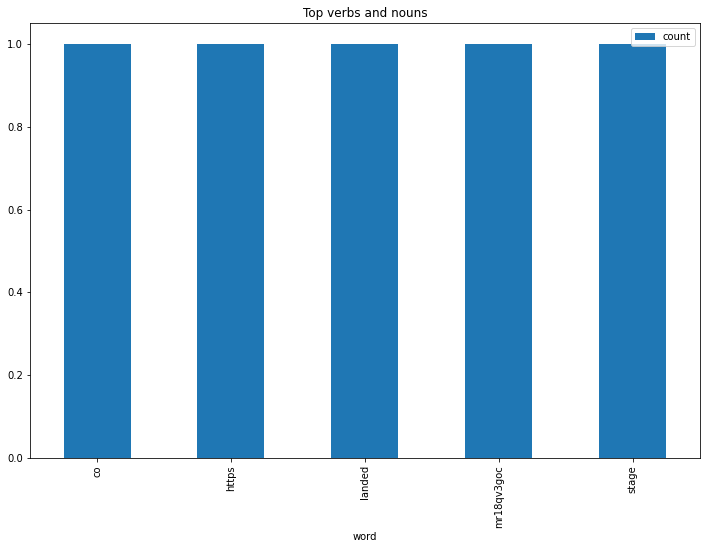

In [26]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#All words
#wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')